<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Online-Credit-Card-Transactions-Portfolio/blob/main/00_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ONLINE CREDIT CARD TRANSACTIONS**

Data Source: https://www.kaggle.com/adityakadiwal/credit-card-fraudulent-transactions

***KPI: Over 90k credit card transactions marked as Fraudulent or Legitimate***

author = Hoagonde Amedegnato

email = amereine69@gmail.com

## **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Import Libraries***

In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## ***Load and Read Data***

In [ ]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/CC_FRAUD.csv (1).zip')
creditcard_df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


## ***Examine Data***

In [ ]:
# Check the first top 10 rows of creditcard_df using .head() method
creditcard_df.head(10)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
5,CIWEVXGWRG.ORG,ROI,386,11,11,0,0,0,1,1,0,1,3,1,-10.096,27,0,49.95,49.95,LEGIT
6,KZOGEIFBAVSI.NET,LM,127,20,20,0,0,1,0,0,0,2,3,1,15.656,9,9,12.95,12.95,LEGIT
7,TMA.COM,AR,649,12,12,0,0,1,1,1,0,1,2,0,-38.320,16,0,10.36,10.36,LEGIT
8,VUHZRNB.COM,BO,308,13,13,0,0,0,1,1,0,2,3,0,33.328,10,0,38.85,38.85,LEGIT
9,EAYROLLTBU.COM,PO,614,6,6,0,0,1,0,0,0,1,2,0,-43.496,8,0,10.36,10.36,LEGIT


In [ ]:
# Check the bottom 10 rows of creditcard_df using .tail() method
creditcard_df.tail(10)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
94672,TMA.COM,KR,123,1,1,0,0,1,0,0,0,1,0,0,11.792,8,0,12.95,12.95,LEGIT
94673,XOSOP.COM,ROK,655,15,15,0,0,0,0,1,0,1,2,0,21.016,22,0,12.95,12.95,LEGIT
94674,VCWGQDR.NET,LM,128,15,15,0,0,1,0,0,0,1,3,0,28.896,6,0,12.95,12.95,LEGIT
94675,XOSOP.COM,ROM,430,9,9,0,0,1,1,0,0,1,3,0,1.048,9,0,12.95,12.95,LEGIT
94676,GLYXCEL.NET,IO,664,0,0,0,0,1,0,0,0,1,0,1,20.776,6,0,12.95,12.95,LEGIT
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT
94681,VUHZRNB.COM,ROK,655,11,11,0,0,0,0,0,0,1,2,0,17.608,20,0,33.03,33.03,LEGIT


In [ ]:
# Check how many rows I have in creditcard_df using len() function
len(creditcard_df)

94682

In [ ]:
# Check the columns of creditcard_df
creditcard_df.columns

Index(['DOMAIN', 'STATE', 'ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1',
       'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5',
       'TRN_AMT', 'TOTAL_TRN_AMT', 'TRN_TYPE'],
      dtype='object')

In [ ]:
# Check how many columns I have in creditcard_df using len() function
len(creditcard_df.columns)

20

In [ ]:
# Check if creditcard_df contains any null values
creditcard_df.isnull().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

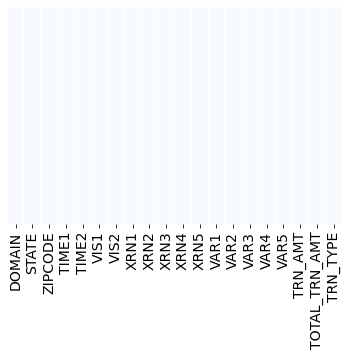

In [ ]:
# Check if I have non null values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

I have non null values in the credit card dataset

In [ ]:
# Using .dtypes() to check data types
print(creditcard_df.dtypes)

DOMAIN            object
STATE             object
ZIPCODE            int64
TIME1              int64
TIME2              int64
VIS1               int64
VIS2               int64
XRN1               int64
XRN2               int64
XRN3               int64
XRN4               int64
XRN5               int64
VAR1               int64
VAR2               int64
VAR3             float64
VAR4               int64
VAR5               int64
TRN_AMT          float64
TOTAL_TRN_AMT    float64
TRN_TYPE          object
dtype: object


In [ ]:
# Using .info() to provide a concise summary of Dataset
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [ ]:
# Let's check the count
creditcard_df.shape

(94682, 20)

In [ ]:
# Let's see if I have duplicated entries in the data
creditcard_df.duplicated().sum()

5068

In [ ]:
# Let's remove the duplicated data of 5068
creditcard_df.drop_duplicates(inplace=True)

In [ ]:
# Let's see if I have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's check the count again
creditcard_df.shape

(89614, 20)

After dropping the duplicated values, I have now 89614 datasets remaining for the analysis

In [ ]:
# Recall my dataframe credit card
creditcard_df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [ ]:
# Using .describe() to provide full summary statistics
creditcard_df.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.00000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000
mean,449.430480,13.897750,13.909523,0.113833,0.018011,0.533354,0.541578,0.399234,0.018881,5.870980,2.412882,0.42875,5.504907,14.059109,1.361606,26.321858,26.312498
std,230.146675,5.265048,5.259802,0.317610,0.132990,0.498889,0.498271,0.489744,0.136105,98.576128,1.005311,0.49490,31.503396,6.526042,2.409152,14.166492,14.175314
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-258.120000,6.000000,0.000000,0.000000,0.000000
25%,166.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,-12.950000,8.000000,0.000000,12.950000,12.950000
50%,600.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.00000,11.488000,12.000000,0.000000,25.900000,25.900000
75%,655.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.00000,28.776000,20.000000,2.000000,38.850000,38.850000
max,694.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000,4.000000,1.00000,65.544000,46.000000,26.000000,95.400000,95.400000


- The count of the Total Transaction Amount for the whole dataset is 89614
- 25% of the Total Transaction Amount for the whole dataset is 12.95
- The standard deviation of the Total Transaction Amount for the whole dataset is 14.17

In [ ]:
# Calculate the median of TOTAL_TRN_AMT
creditcard_df['TOTAL_TRN_AMT'].median()

25.9

In [ ]:
# Calculate the variance of TOTAL_TRN_AMT
creditcard_df['TOTAL_TRN_AMT'].var()

200.9395280777016

In [ ]:
# Calculate the mean of TOTAL_TRN_AMT
creditcard_df['TOTAL_TRN_AMT'].mean()

26.312497712421774

In [ ]:
# Let's see who made the transaction amount of $ 95.400000	
creditcard_df[creditcard_df['TRN_AMT'] == 95.400000	]

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
3558,TCN.COM,AO,675,16,16,0,0,0,0,0,0,1,3,0,4.800,19,0,95.4,95.4,LEGIT
6552,ADZUIGVYPDY.COM,NO,630,18,18,0,0,0,0,1,0,1,2,0,34.048,6,0,95.4,95.4,FRAUD
8362,TMA.COM,LM,127,16,16,0,0,1,1,0,0,2,0,0,45.264,6,0,95.4,95.4,LEGIT
8382,YKQNPPOMT.ORG,VO,600,13,13,0,0,1,1,1,0,1,2,0,17.896,9,0,95.4,95.4,LEGIT
13963,TMA.COM,KR,110,1,1,0,0,1,1,1,0,1,2,0,37.920,18,0,95.4,95.4,LEGIT
14432,XOSOP.COM,MO,685,20,20,0,0,0,1,0,0,1,2,1,3.024,20,4,95.4,95.4,LEGIT
15663,TCN.COM,OO,644,6,6,0,0,1,1,1,0,5,2,1,-34.400,22,0,95.4,95.4,LEGIT
18026,XOSOP.COM,MO,685,10,10,1,0,1,1,1,0,1,3,0,29.584,17,0,95.4,95.4,LEGIT
24992,NEKSXUK.NET,LM,127,10,10,0,0,1,0,0,0,1,2,1,23.376,23,0,95.4,95.4,LEGIT
25553,VCIOS.US,UBAO,669,2,2,0,0,0,0,0,0,2,2,1,26.720,13,6,95.4,95.4,FRAUD


Here is the dataset of the credit card holders that made the amount of $95.400000

## ***Descriptive Statistical Analysis: Using "value counts" to count each feature***

In [ ]:
# Count the variable of The domain name of the customer's email address that was used for the transaction
creditcard_df['DOMAIN'].value_counts()

TMA.COM                  15633
XOSOP.COM                14931
VUHZRNB.COM              10888
TCN.COM                   3829
NEKSXUK.NET               3704
                         ...  
ADOGGHJHLBB.COM              1
EOXRIMRNKKKD.COM             1
ZFZNQFL.NET                  1
WBABHZJNEULJHJT.COM          1
XFGLFTKAWGMULFBYQ.COM        1
Name: DOMAIN, Length: 9809, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
DOMAIN_counts = creditcard_df['DOMAIN'].value_counts().to_frame()
DOMAIN_counts.rename(columns = {'DOMAIN': 'value_counts'}, inplace = True)
DOMAIN_counts.index.name = 'DOMAIN'
DOMAIN_counts

,value_counts
DOMAIN,
TMA.COM,15633
XOSOP.COM,14931
VUHZRNB.COM,10888
TCN.COM,3829
NEKSXUK.NET,3704
...,...
ADOGGHJHLBB.COM,1
EOXRIMRNKKKD.COM,1
ZFZNQFL.NET,1


In term of DOMAIN as a variable, I can count:

- 15633 for TMA.COM
- 14931 for XOSOP.COM
- 3829 for TCN.COM
- 1 for HQGSSHYA.COM
- etc.

In [ ]:
# Count the variable of The state code of the customer's location
creditcard_df['STATE'].value_counts()

KR      18599
MO       7867
VO       6382
ROK      5434
PO       4081
NAO      3449
CO       3358
AO       2948
LM       2570
LO       2481
BO       2286
SO       2226
ROM      2135
SK       2105
AR       1628
MV       1532
CR       1472
IO       1402
ROB      1350
EAO      1188
,O       1095
OO       1075
RONO     1034
ROT      1024
NO       1009
KO        925
TO        839
ROI       694
TAO       661
UO        587
KAO       549
NNO       530
K         515
ROA       512
BR        381
UBAO      380
YO        373
SP        368
TR        304
KK        303
AK        299
ROU       289
RO        276
JAO       216
ROD       209
AAO       204
YAO       128
MER        97
PK         88
CAO        83
SR         70
XV          3
DSA         1
Name: STATE, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
STATE_counts = creditcard_df['STATE'].value_counts().to_frame()
STATE_counts.rename(columns = {'STATE': 'value_counts'}, inplace = True)
STATE_counts.index.name = 'STATE'
STATE_counts

,value_counts
STATE,
KR,18599
MO,7867
VO,6382
ROK,5434
PO,4081
NAO,3449
CO,3358
AO,2948
LM,2570


I count:

- 6382 States in VO
- 5434 States in ROK
- 4081 States in PO
- 3 States in XV

In [ ]:
# Count the variable of The zip code of the customer's location
creditcard_df['ZIPCODE'].value_counts()

685    7867
655    5434
614    4081
166    3449
672    3358
       ... 
194      36
191      36
197      29
692       3
694       1
Name: ZIPCODE, Length: 94, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
ZIPCODE_counts = creditcard_df['ZIPCODE'].value_counts().to_frame()
ZIPCODE_counts.rename(columns = {'ZIPCODE': 'value_counts'}, inplace = True)
ZIPCODE_counts.index.name = 'ZIPCODE'
ZIPCODE_counts

,value_counts
ZIPCODE,
685,7867
655,5434
614,4081
166,3449
672,3358
...,...
194,36
191,36
197,29


Number of Zipcode at:

- 655 are 5434
- 614 are 4081
- 672 are 3358
- 197 are 29
- etc.

In [ ]:
# Count the variable of The Hour feature #1 of the transaction
creditcard_df['TIME1'].value_counts()

13    6695
14    6456
12    6406
11    6288
15    6133
16    5731
10    5728
17    5371
18    4971
19    4743
9     4721
20    4570
21    4025
8     3445
22    3365
23    2689
7     1950
0     1934
1     1219
6      980
2      683
5      582
3      491
4      438
Name: TIME1, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
TIME1_counts = creditcard_df['TIME1'].value_counts().to_frame()
TIME1_counts.rename(columns = {'TIME1': 'value_counts'}, inplace = True)
TIME1_counts.index.name = 'TIME1'
TIME1_counts

,value_counts
TIME1,
13,6695
14,6456
12,6406
11,6288
15,6133
16,5731
10,5728
17,5371
18,4971


In [ ]:
# Count the variable of The Hour feature #2 of the transaction
creditcard_df['TIME2'].value_counts()

13    6697
14    6463
12    6409
11    6279
15    6127
16    5739
10    5722
17    5359
18    4973
19    4747
9     4719
20    4576
21    4015
8     3454
22    3372
23    2732
7     1955
0     1899
1     1207
6      970
2      680
5      589
3      490
4      441
Name: TIME2, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
TIME2_counts = creditcard_df['TIME2'].value_counts().to_frame()
TIME2_counts.rename(columns = {'TIME2': 'value_counts'}, inplace = True)
TIME2_counts.index.name = 'TIME2'
TIME2_counts

,value_counts
TIME2,
13,6697
14,6463
12,6409
11,6279
15,6127
16,5739
10,5722
17,5359
18,4973


In [ ]:
# Count the variable of The Anonymized feature #1 for feature VIS
creditcard_df['VIS1'].value_counts()

0    79413
1    10201
Name: VIS1, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VIS1_counts = creditcard_df['VIS1'].value_counts().to_frame()
VIS1_counts.rename(columns = {'VIS1': 'value_counts'}, inplace = True)
VIS1_counts.index.name = 'VIS1'
VIS1_counts

,value_counts
VIS1,
0,79413
1,10201


In [ ]:
# Count the variable of The Anonymized feature #2 for feature VIS
creditcard_df['VIS2'].value_counts()

0    88000
1     1614
Name: VIS2, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VIS2_counts = creditcard_df['VIS2'].value_counts().to_frame()
VIS2_counts.rename(columns = {'VIS2': 'value_counts'}, inplace = True)
VIS2_counts.index.name = 'VIS2'
VIS2_counts

,value_counts
VIS2,
0,88000
1,1614


In [ ]:
# Count the variable of The Anonymized feature #1 for feature XRN
creditcard_df['XRN1'].value_counts()

1    47796
0    41818
Name: XRN1, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
XRN1_counts = creditcard_df['XRN1'].value_counts().to_frame()
XRN1_counts.rename(columns = {'XRN1': 'value_counts'}, inplace = True)
XRN1_counts.index.name = 'XRN1'
XRN1_counts

,value_counts
XRN1,
1,47796
0,41818


In [ ]:
# Count the variable of The Anonymized feature #2 for feature XRN
creditcard_df['XRN2'].value_counts()

1    48533
0    41081
Name: XRN2, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
XRN2_counts = creditcard_df['XRN2'].value_counts().to_frame()
XRN2_counts.rename(columns = {'XRN2': 'value_counts'}, inplace = True)
XRN2_counts.index.name = 'XRN2'
XRN2_counts

,value_counts
XRN2,
1,48533
0,41081


In [ ]:
# Count the variable of The Anonymized feature #3 for feature XRN
creditcard_df['XRN3'].value_counts()

0    53837
1    35777
Name: XRN3, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
XRN3_counts = creditcard_df['XRN3'].value_counts().to_frame()
XRN3_counts.rename(columns = {'XRN3': 'value_counts'}, inplace = True)
XRN3_counts.index.name = 'XRN3'
XRN3_counts

,value_counts
XRN3,
0,53837
1,35777


In [ ]:
# Count the variable of The Anonymized feature #4 for feature XRN
creditcard_df['XRN4'].value_counts()

0    87922
1     1692
Name: XRN4, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
XRN4_counts = creditcard_df['XRN4'].value_counts().to_frame()
XRN4_counts.rename(columns = {'XRN4': 'value_counts'}, inplace = True)
XRN4_counts.index.name = 'XRN4'
XRN4_counts

,value_counts
XRN4,
0,87922
1,1692


In [ ]:
# Count the variable of The Anonymized feature #5 for feature XRN
creditcard_df['XRN5'].value_counts()

1       68727
2       16707
3        2807
4         616
5         182
6          93
1600       88
7          72
3278       49
364        42
200        35
8          32
1643       26
20         23
977        16
0          14
32         14
1434       10
150         8
29          7
30          5
373         5
77          4
983         4
162         4
39          4
118         3
130         3
44          3
984         2
11          2
9           2
985         2
16          1
109         1
119         1
Name: XRN5, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
XRN5_counts = creditcard_df['XRN5'].value_counts().to_frame()
XRN5_counts.rename(columns = {'XRN5': 'value_counts'}, inplace = True)
XRN5_counts.index.name = 'XRN5'
XRN5_counts

,value_counts
XRN5,
1,68727
2,16707
3,2807
4,616
5,182
6,93
1600,88
7,72
3278,49


In [ ]:
# Count the variable of The Anonymized feature #1 for feature VAR
creditcard_df['VAR1'].value_counts()

3    52010
2    22584
0     9701
4     3237
1     2082
Name: VAR1, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VAR1_counts = creditcard_df['VAR1'].value_counts().to_frame()
VAR1_counts.rename(columns = {'VAR1': 'value_counts'}, inplace = True)
VAR1_counts.index.name = 'VAR1'
VAR1_counts

,value_counts
VAR1,
3,52010
2,22584
0,9701
4,3237
1,2082


In [ ]:
# Count the variable of The Anonymized feature #2 for feature VAR
creditcard_df['VAR2'].value_counts()

0    51192
1    38422
Name: VAR2, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VAR2_counts = creditcard_df['VAR2'].value_counts().to_frame()
VAR2_counts.rename(columns = {'VAR2': 'value_counts'}, inplace = True)
VAR2_counts.index.name = 'VAR2'
VAR2_counts

,value_counts
VAR2,
0,51192
1,38422


In [ ]:
# Count the variable of The Anonymized feature #3 for feature VAR
creditcard_df['VAR3'].value_counts()

 26.720    48
-7.648     48
 1.992     48
 5.208     46
 13.344    43
           ..
-99.048     1
-76.592     1
-48.304     1
-29.600     1
-75.088     1
Name: VAR3, Length: 15786, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VAR3_counts = creditcard_df['VAR3'].value_counts().to_frame()
VAR3_counts.rename(columns = {'VAR3': 'value_counts'}, inplace = True)
VAR3_counts.index.name = 'VAR3'
VAR3_counts

,value_counts
VAR3,
26.720,48
-7.648,48
1.992,48
5.208,46
13.344,43
...,...
-99.048,1
-76.592,1
-48.304,1


In [ ]:
# Count the variable of The Anonymized feature #4 for feature VAR
creditcard_df['VAR4'].value_counts()

9     11878
8      9265
7      7529
10     6095
6      5666
18     4215
20     4174
19     3845
21     3828
11     3641
22     3534
17     3301
16     2900
23     2848
12     2654
15     2308
24     2303
14     1969
13     1814
25     1658
26     1275
27      943
28      631
29      431
30      267
31      186
32      130
33       81
38       74
34       52
35       48
36       41
37       18
39        7
40        2
42        1
41        1
46        1
Name: VAR4, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VAR4_counts = creditcard_df['VAR4'].value_counts().to_frame()
VAR4_counts.rename(columns = {'VAR4': 'value_counts'}, inplace = True)
VAR4_counts.index.name = 'VAR4'
VAR4_counts

,value_counts
VAR4,
9,11878
8,9265
7,7529
10,6095
6,5666
18,4215
20,4174
19,3845
21,3828


In [ ]:
# Count the variable of The Anonymized feature #5 for feature VAR
creditcard_df['VAR5'].value_counts()

0     55654
2      8987
1      6903
4      6349
9      4861
3      4631
5      1055
6       697
7       165
8       158
10       75
23       13
19       13
21        9
11        8
12        7
25        5
16        5
20        4
18        3
22        3
13        2
15        2
17        2
26        2
24        1
Name: VAR5, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
VAR5_counts = creditcard_df['VAR5'].value_counts().to_frame()
VAR5_counts.rename(columns = {'VAR5': 'value_counts'}, inplace = True)
VAR5_counts.index.name = 'VAR5'
VAR5_counts

,value_counts
VAR5,
0,55654
2,8987
1,6903
4,6349
9,4861
3,4631
5,1055
6,697
7,165


In [ ]:
# Count the variable of The transaction amount
creditcard_df['TRN_AMT'].value_counts()

12.95    31243
38.85    30393
49.95     6104
10.36     6013
25.90     4886
         ...  
63.96        1
16.96        1
33.02        1
19.00        1
35.85        1
Name: TRN_AMT, Length: 88, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
TRN_AMT_counts = creditcard_df['TRN_AMT'].value_counts().to_frame()
TRN_AMT_counts.rename(columns = {'TRN_AMT': 'value_counts'}, inplace = True)
TRN_AMT_counts.index.name = 'TRN_AMT'
TRN_AMT_counts

,value_counts
TRN_AMT,
12.95,31243
38.85,30393
49.95,6104
10.36,6013
25.90,4886
...,...
63.96,1
16.96,1
33.02,1


The count of the Transaction Amount of:

- 12.95 Dollars is 31243
- 38.85 Dollars is 30393
- 10.36 Dollars is 6013
- 33.02 Dollars is 1

In [ ]:
# Count the variable of The total transaction amount
creditcard_df['TOTAL_TRN_AMT'].value_counts()

12.95    31213
38.85    30384
49.95     6104
10.36     6013
25.90     4885
         ...  
63.96        1
16.96        1
33.02        1
19.00        1
35.85        1
Name: TOTAL_TRN_AMT, Length: 88, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
TOTAL_TRN_AMT_counts = creditcard_df['TOTAL_TRN_AMT'].value_counts().to_frame()
TOTAL_TRN_AMT_counts.rename(columns = {'TOTAL_TRN_AMT': 'value_counts'}, inplace = True)
TOTAL_TRN_AMT_counts.index.name = 'TOTAL_TRN_AMT'
TOTAL_TRN_AMT_counts

,value_counts
TOTAL_TRN_AMT,
12.95,31213
38.85,30384
49.95,6104
10.36,6013
25.90,4885
...,...
63.96,1
16.96,1
33.02,1


In [ ]:
# Count the variable of The type of transaction whether FRAUD or LEGIT
# Distribution of Legit transactions and Fraud transactions
creditcard_df['TRN_TYPE'].value_counts()

LEGIT    87562
FRAUD     2052
Name: TRN_TYPE, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
TRN_TYPE_counts = creditcard_df['TRN_TYPE'].value_counts().to_frame()
TRN_TYPE_counts.rename(columns = {'TRN_TYPE': 'value_counts'}, inplace = True)
TRN_TYPE_counts.index.name = 'TRN_TYPE'
TRN_TYPE_counts

,value_counts
TRN_TYPE,
LEGIT,87562
FRAUD,2052


After removing the duplicate data, I have a remaining 89614 credit cards: 87562 cards are normals (legitimates), and the rest of 2052 cards are fraudulents

## ***Separating the data for Analysis***

In [ ]:
# Let's filter or extract all FRAUD columns from TRN_TYPE and recall creditcard_df
# Here is the display of 2052 cards that are marked as fraudulent transactions
Fraud = creditcard_df[creditcard_df.TRN_TYPE == 'FRAUD']

In [ ]:
Fraud

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
57,VUHZRNB.COM,JAO,679,19,19,0,0,0,0,0,0,1,3,0,45.376,19,3,12.95,12.95,FRAUD
141,TMA.COM,MV,369,14,14,0,0,1,1,1,0,1,2,1,40.400,9,0,11.01,11.01,FRAUD
186,XOSOP.COM,KR,122,19,19,0,0,0,0,0,0,1,4,1,50.648,21,4,0.00,0.00,FRAUD
283,BRZWCURTY.NET,KR,120,13,13,0,0,1,0,0,0,1,3,1,39.848,8,0,36.26,36.26,FRAUD
290,TMA.COM,BR,670,21,21,0,0,0,1,1,0,1,0,0,-9.624,24,0,12.95,12.95,FRAUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94528,XZXDQOGHY.NET,AR,649,8,8,0,0,0,0,0,0,1,3,0,-23.080,23,0,44.85,44.85,FRAUD
94544,TMA.COM,UBAO,669,13,13,0,0,0,0,0,0,1,2,0,-13.856,22,0,12.95,12.95,FRAUD
94565,VUHZRNB.COM,AR,649,7,7,0,0,0,0,0,0,1,3,1,32.664,26,3,25.90,25.90,FRAUD
94606,XOSOP.COM,UBAO,669,20,20,0,0,0,0,0,0,1,2,1,12.120,22,0,38.85,38.85,FRAUD


This is the display of 2052 Credit Cards that are FRAUDULENT

In [ ]:
Fraud.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
std,198.411439,5.042149,5.028878,0.322030,0.136579,0.498107,0.498889,0.487055,0.111875,60.654782,0.967565,0.495444,31.190260,6.343103,2.354177,14.427088,14.427088
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-155.560000,6.000000,0.000000,0.000000,0.000000
25%,600.750000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.106000,9.000000,0.000000,12.950000,12.950000
50%,655.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.784000,12.000000,0.000000,12.950000,12.950000
75%,679.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.892000,19.000000,2.000000,38.850000,38.850000
max,694.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1643.000000,4.000000,1.000000,61.960000,38.000000,12.000000,95.400000,95.400000


- The count of the Total Transaction Amount that is fraud is 2052
- The minimum of the Total Transaction Amount that is fraud is 0
- The standard deviation of the Total Transaction Amount that is fraud is 14.42

In [ ]:
print(Fraud.shape)

(2052, 20)


In [ ]:
# Let's filter or extract all LEGIT columns from TRN_TYPE and recall creditcard_df
# Here is the display of 87562 cards that are marked as legitimate transactions
Legit = creditcard_df[creditcard_df.TRN_TYPE == 'LEGIT']

In [ ]:
Legit

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


This is the display of 87562 Credit Cards that are LEGITIMATE

In [ ]:
Legit.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000,87562.000000
mean,446.883808,13.899831,13.911343,0.113748,0.017987,0.533085,0.541730,0.399534,0.019027,5.913718,2.411720,0.428679,5.488665,14.058770,1.361470,26.353484,26.343905
std,230.224741,5.270169,5.265106,0.317507,0.132906,0.498907,0.498258,0.489805,0.136619,99.291098,1.006154,0.494890,31.510691,6.530302,2.410438,14.158869,14.167924
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-258.120000,6.000000,0.000000,0.000000,0.000000
25%,166.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.960000,8.000000,0.000000,12.950000,12.950000
50%,600.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.468000,12.000000,0.000000,25.900000,25.900000
75%,655.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.776000,20.000000,2.000000,38.850000,38.850000
max,693.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000,4.000000,1.000000,65.544000,46.000000,26.000000,95.400000,95.400000


- The count of the Total Transaction Amount that is legitimate is 87562
- The mean of the Total Transaction Amount that is legitimate is 26.34
- The standard deviation of the Total Transaction Amount that is legitimate is 14.16

In [ ]:
print(Legit.shape)

(87562, 20)


In [ ]:
# Let's calculate the percentage of the credit card FRAUD
fraud_percentage = round(2052/87562*100, 2)
fraud_percentage

2.34

Recap (after deducting the duplicated data)

- Total Number of Transactions are 89614
- Number of Legitimate Transactions are 87562
- Number of Fraudulent Transactions are 2052
- Percentage of fraud Transactions is 2.34

*Only 2.34% of Transactions are FRAUDULENT*


In [ ]:
# Statistical Measures of Legit Data
Legit.TOTAL_TRN_AMT.describe()

count    87562.000000
mean        26.343905
std         14.167924
min          0.000000
25%         12.950000
50%         25.900000
75%         38.850000
max         95.400000
Name: TOTAL_TRN_AMT, dtype: float64

In [ ]:
# Statistical Measures of Fraud Data
Fraud.TOTAL_TRN_AMT.describe()

count    2052.000000
mean       24.972315
std        14.427088
min         0.000000
25%        12.950000
50%        12.950000
75%        38.850000
max        95.400000
Name: TOTAL_TRN_AMT, dtype: float64

In [ ]:
# Comparing the values for both Transactions
creditcard_df.groupby('TRN_TYPE').mean()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
TRN_TYPE,,,,,,,,,,,,,,,,,
FRAUD,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
LEGIT,446.883808,13.899831,13.911343,0.113748,0.017987,0.533085,0.541730,0.399534,0.019027,5.913718,2.411720,0.428679,5.488665,14.058770,1.361470,26.353484,26.343905


Here is the mean values of the whole Credit Card dataset grouped into two categories: Fraud Transactions and Normal (Legit) Transactions.

## ***Visualizations***

In [ ]:
# Let's drop 'DOMAIN' columns from creditcard_df
creditcard_df.drop("DOMAIN", axis = 1, inplace= True)

In [ ]:
# Let's drop 'STATE' columns from creditcard_df
creditcard_df.drop("STATE", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT


In [ ]:
creditcard_df.columns

Index(['ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3',
       'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TRN_AMT',
       'TOTAL_TRN_AMT', 'TRN_TYPE'],
      dtype='object')

In [ ]:
n = len(creditcard_df.columns) - 1
n

17

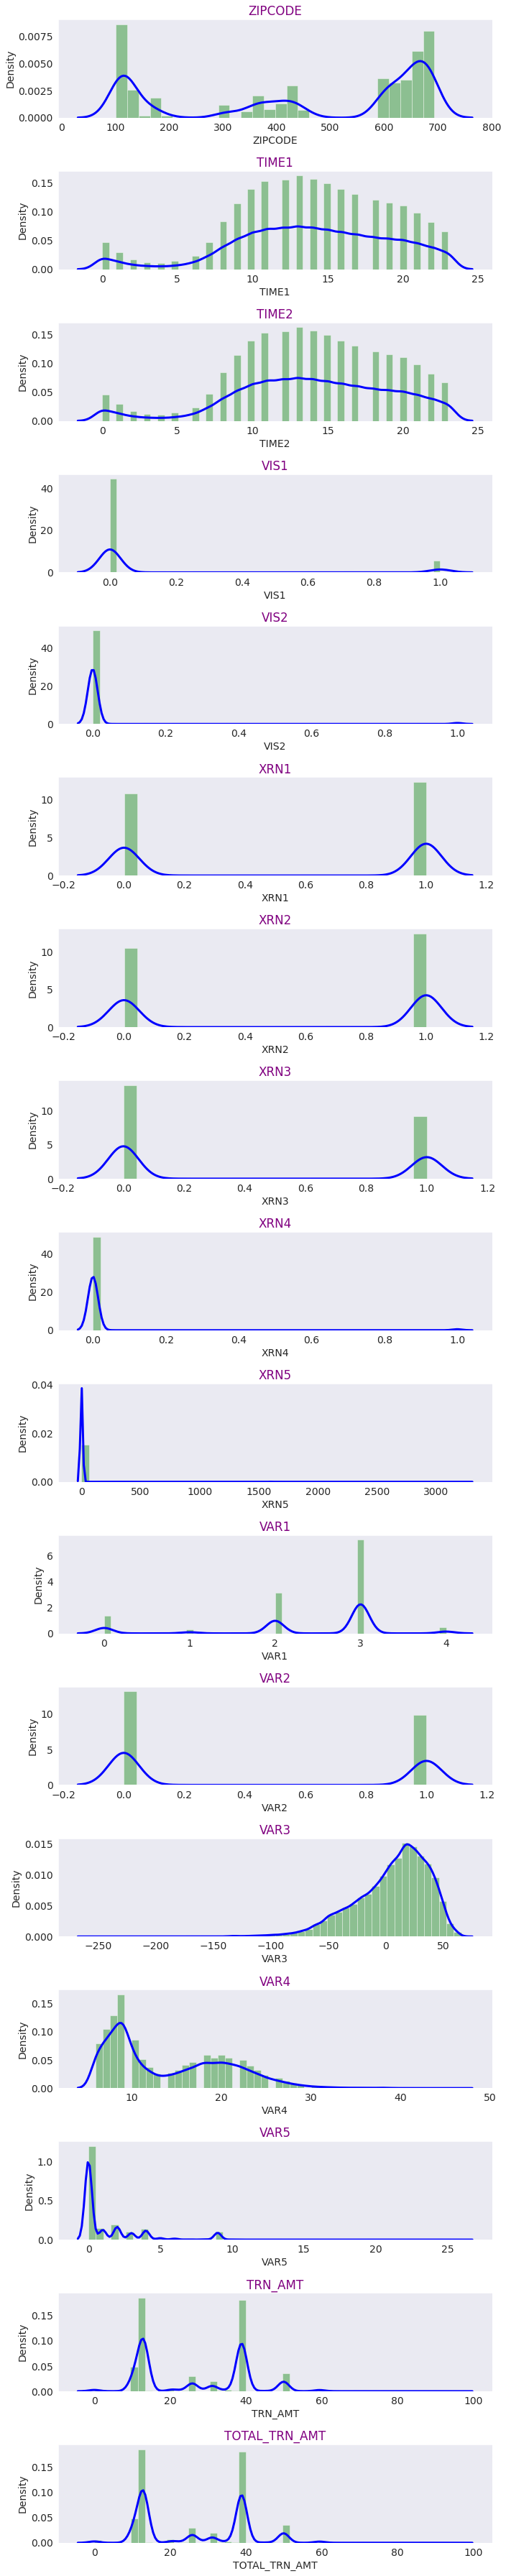

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 
# I am not going to plot the last column

sns.set_style('dark')
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)-1):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i], color = 'Purple')

plt.tight_layout()

Here is the distribution of the features variables

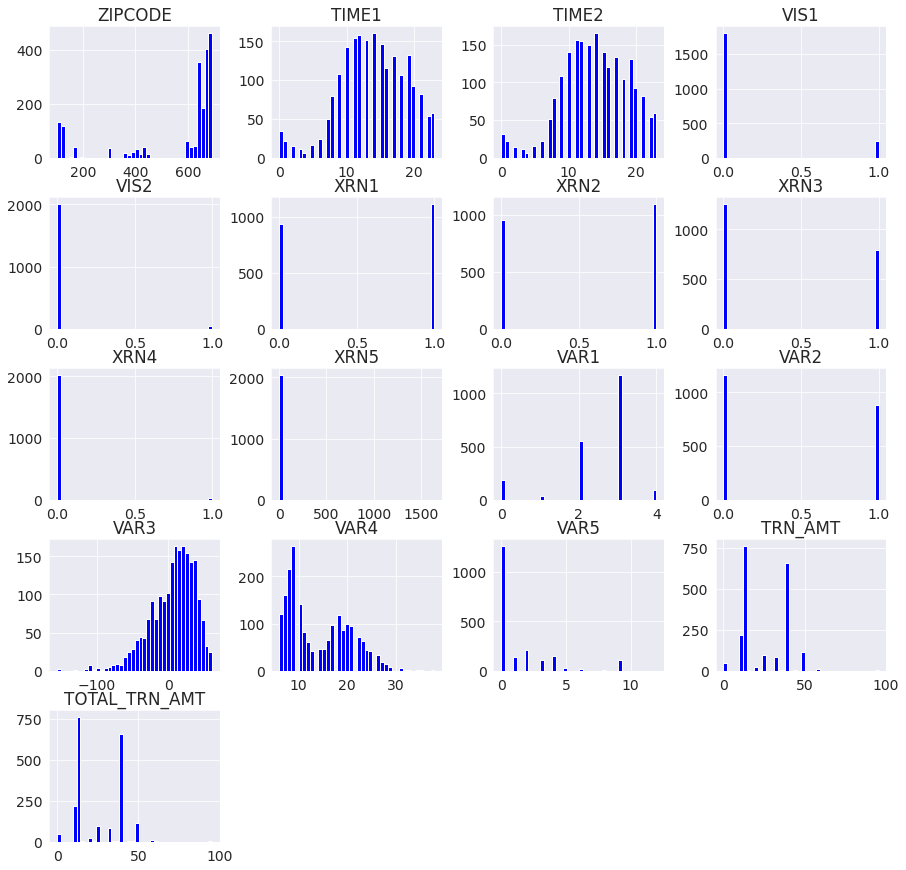

In [ ]:
# Histogram of credit card that are FRAUD
sns.set_style('darkgrid')

Fraud.hist(figsize=(15, 15), bins = 40, color = 'Blue');

Histogram of the credit card datasets that are FRAUDULENT

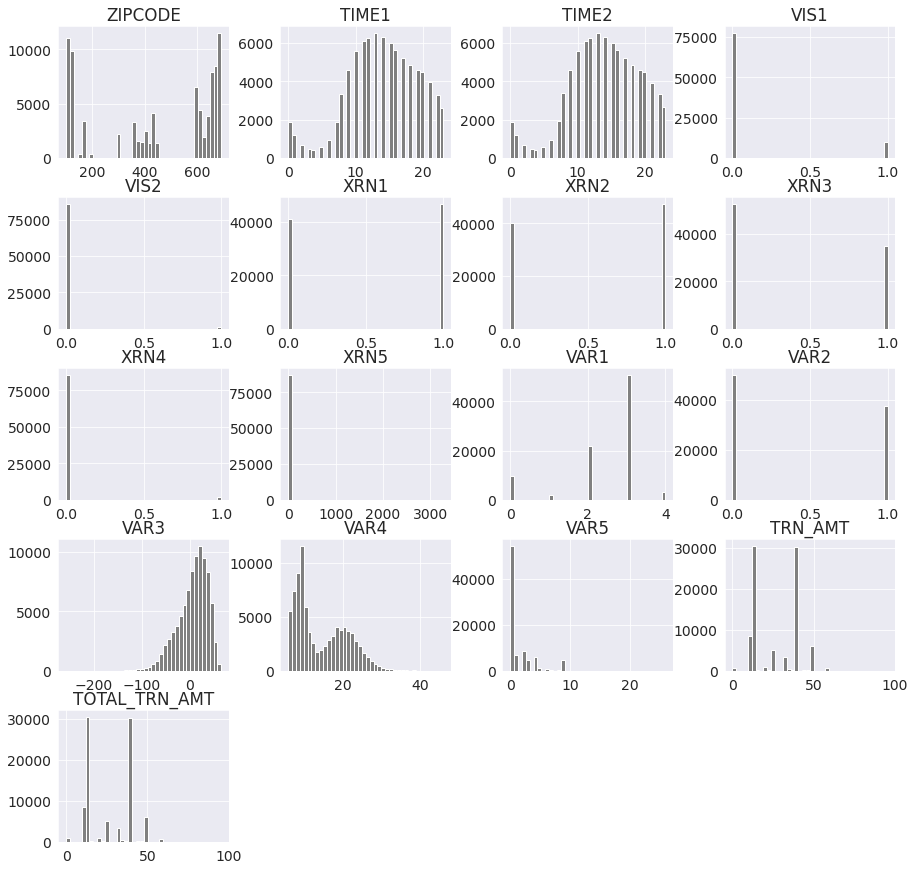

In [ ]:
# Histogram of credit card that are LEGIT
sns.set_style('darkgrid')

Legit.hist(figsize=(15, 15), bins = 40, color = 'Gray');

Histogram of the credit card datasets that are LEGITIMATE

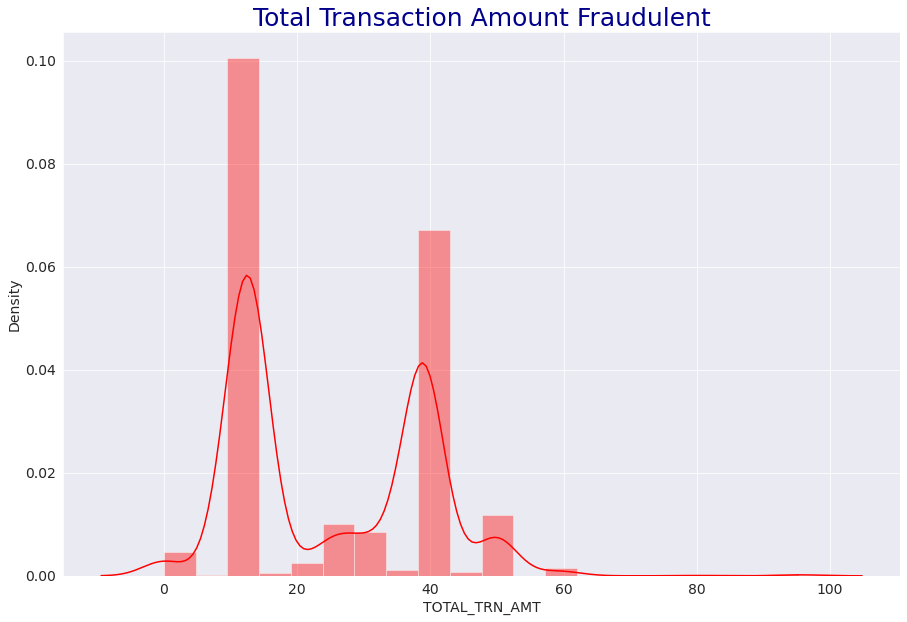

In [ ]:
# Distribution of credit card that is'Total Transaction Amount' FRAUD
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
sns.distplot(Fraud['TOTAL_TRN_AMT'], color = 'Red', bins = 20)

plt.title('Total Transaction Amount Fraudulent', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')

plt.show()

Here is the Distribution of the Total Transactions Amounts that are FRAUDULENT

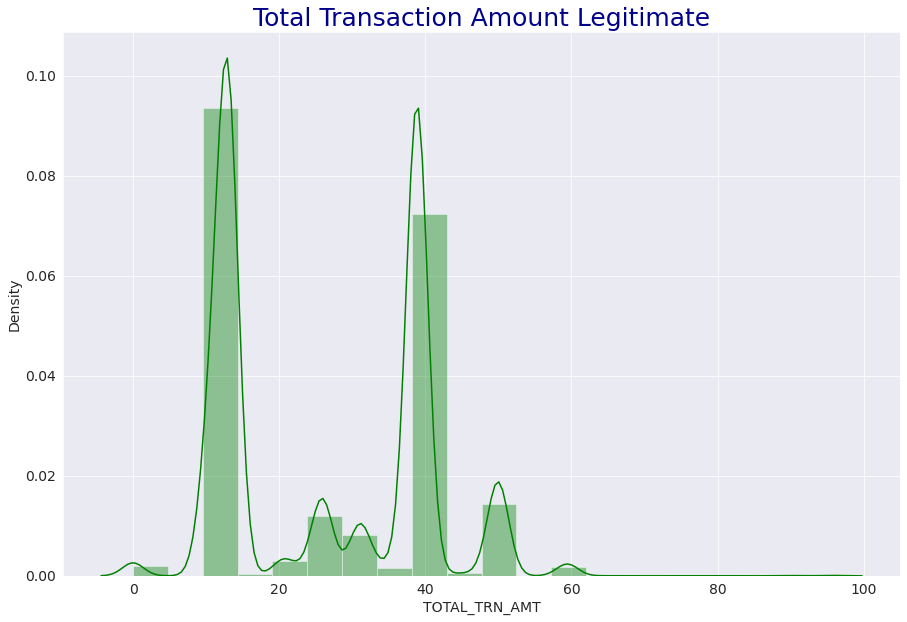

In [ ]:
# Distribution of credit card that is'Total Transaction Amount' LEGIT
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
sns.distplot(Legit['TOTAL_TRN_AMT'], color = 'Green', bins = 20)

plt.title('Total Transaction Amount Legitimate', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show()

Here is the Distribution of the Total Transactions Amounts that are LEGITIMATE

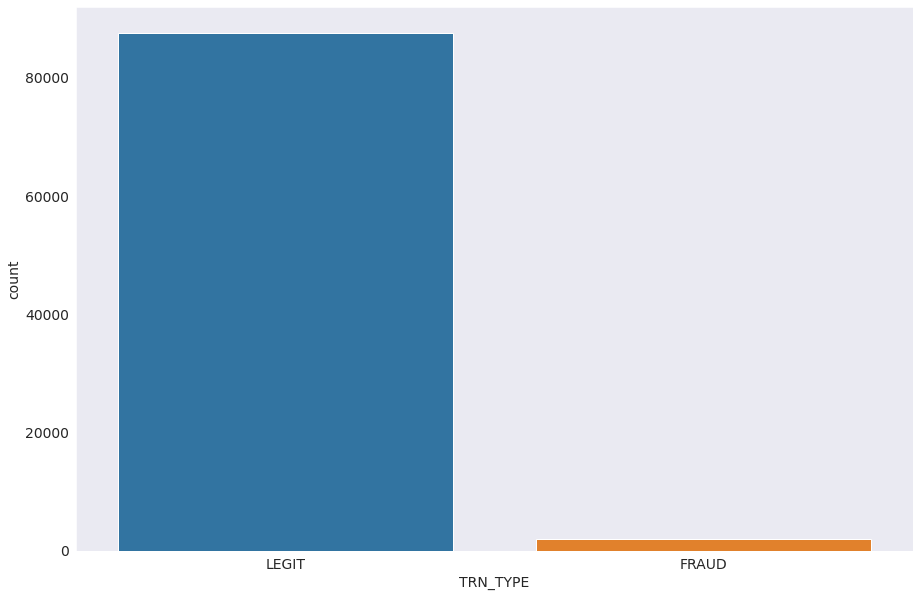

In [ ]:
# Let's print out countplot to know how many Credit Card data belong to FRAUD and LEGIT
plt.figure(figsize=(15, 10))
sns.set_style('dark')
sns.countplot(creditcard_df['TRN_TYPE'], label = "Count");

Here is the summary of the parts of the data that are Fraudulent and Legitimate:

- 87562 of the credit card data are Legitimate
- 2052 of the credit card data are Fraudulent
- 2.34% is the percentage of the fraud transactions

In [ ]:
correlations = creditcard_df.corr()

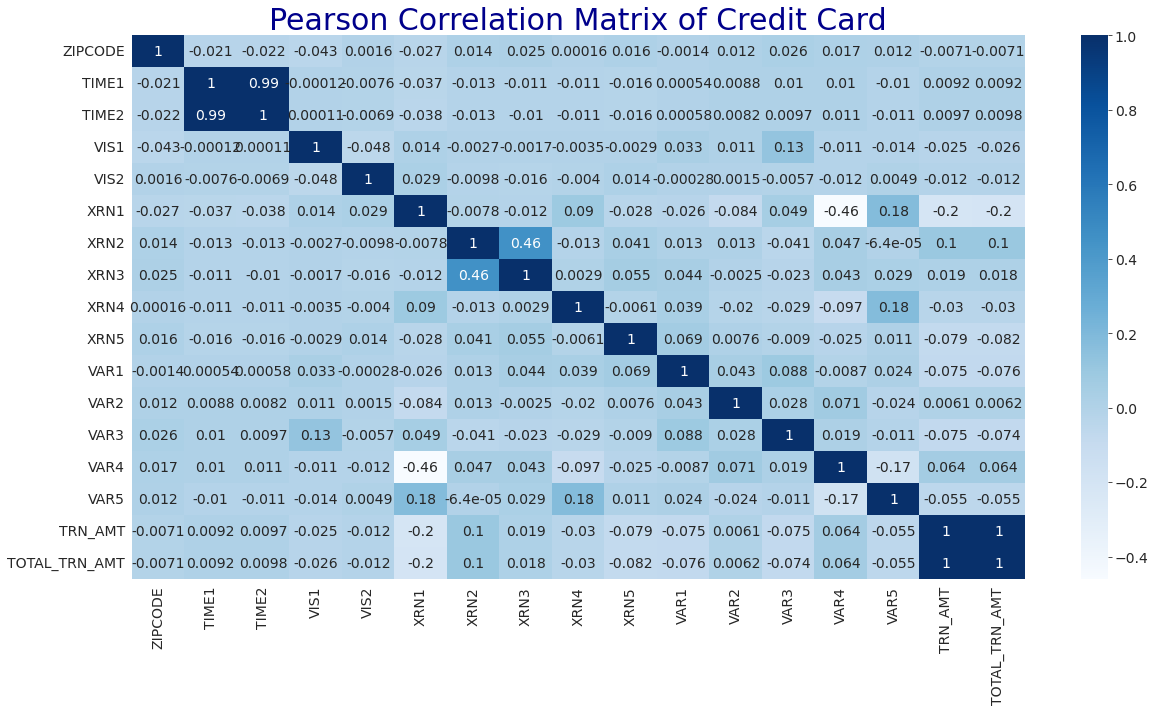

In [ ]:
# Correlation Matrix between the credit card
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, cmap ='Blues', annot = True)
plt.title('Pearson Correlation Matrix of Credit Card', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

- There is a strong correlation of 0.99 between TIME1 and TIME2, which correlation is close to 1, means that there is a large positive relationship.
- There is a correlation of 0.46 between XRN2 and XRN3, which correlation is close to 1, means that there is a positive relationship.
- There is a correlation of -0.46 between XRN1 and VAR4, which correlation is close to 0, means that there is no relationship.